## **AI Content Firewall for Kids - Kids.ai**

### `Business Understanding`

### `Data Understanding`

In [1]:
import cv2
import os
import numpy as np
import pandas as pd
import plotly.express as px
import os
import os


from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
# from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import ast

print(tf.__version__)

2.18.0


#### **Load data set**

In [8]:
csv_file = "../Dataset/frame_data.csv"  
video_image_df = pd.read_csv(csv_file)
video_image_df.head()

,Subset,Label,Video Name,Frame Number,Timestamp (s),Image Path
0,train,Adult Content,10h30.tong106thaithinh_7224744031518035205,0,0.0,extracted_frames\train\Adult Content\10h30.ton...
1,train,Adult Content,10h30.tong106thaithinh_7224744031518035205,360,12.0,extracted_frames\train\Adult Content\10h30.ton...
2,train,Adult Content,1991.music.dj_7053983190456765722,0,0.0,extracted_frames\train\Adult Content\1991.musi...
3,train,Adult Content,199namm_7254949499859225861,0,0.0,extracted_frames\train\Adult Content\199namm_7...
4,train,Adult Content,1life.anthonyblane_7283159583516790021,0,0.0,extracted_frames\train\Adult Content\1life.ant...


In [9]:
video_image_df.shape

(14499, 6)

In [10]:
video_image_df['Label'] = video_image_df['Label'].replace({
    'Adult Content': 'Adult',
    'Harmful Content': 'Harmful'
})

In [ ]:
# Count the occurrences of each label per subset
subset_counts = video_image_df.groupby(["Label", "Subset"]).size().reset_index(name="Count")

# Pivot the data to get a stacked format
pivot_df = subset_counts.pivot(index="Label", columns="Subset", values="Count").fillna(0)

# Plot the stacked bar chart using Plotly
fig = px.bar(pivot_df, 
             x=pivot_df.index, 
             y=["train", "test", "val"], 
             title="Class Distribution Across Train, Val, and Test",
             labels={"value": "Number of Transcriptions", "Label": "Category"},
             color_discrete_map={"train": "green", "test": "orange", "val": "yellow"},
             barmode="stack")

# Show the plot
fig.show()

In [18]:
video_image_df.drop(columns=['Subset', 'Video Name', 'Frame Number', 'Timestamp (s)'], inplace = True)
video_image_df.head()

,Label,Image Path
0,Adult Content,extracted_frames\train\Adult Content\10h30.ton...
1,Adult Content,extracted_frames\train\Adult Content\10h30.ton...
2,Adult Content,extracted_frames\train\Adult Content\1991.musi...
3,Adult Content,extracted_frames\train\Adult Content\199namm_7...
4,Adult Content,extracted_frames\train\Adult Content\1life.ant...


In [19]:
video_image_df['Label'].unique()

array(['Adult Content', 'Harmful Content', 'Safe', 'Suicide'],
      dtype=object)

In [20]:
video_image_df['Label'].value_counts()

Label
Safe               5896
Adult Content      3436
Harmful Content    3396
Suicide            1771
Name: count, dtype: int64

In [21]:
# Replace specific values in the 'Label' column
video_image_df['Label'] = video_image_df['Label'].replace({
    'Adult Content': 'Adult',
    'Harmful Content': 'Harmful'
})

#### **Load Additional images from the web**

In [ ]:
# Path to your top-level folder with subfolders "adult", "harmful", "suicide", etc.
data_dir = "../Dataset/web_images"

# Valid image extensions that imghdr might return
image_exts = {"jpeg", "jpg", "bmp", "png"}

for label_folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, label_folder)
    
    # Skip if it's not a directory
    if not os.path.isdir(folder_path):
        continue
    
    for image_file in os.listdir(folder_path):
        image_path = os.path.join(folder_path, image_file)

        # Skip if it's not a file
        if not os.path.isfile(image_path):
            continue

        try:
            # Check if imghdr recognizes the file type
            file_type = imghdr.what(image_path)
            
            # If the file type is None or not in our valid set, remove the file
            if file_type not in image_exts:
                print(f"Removing invalid file: {image_path}")
                os.remove(image_path)

        except Exception as e:
            # If there's an error reading the file, you can choose to remove it
            print(f"Issue with image {image_path}, error: {e}")
            # os.remove(image_path)  # Uncomment if you want to remove on error


C:\Users\rache\AppData\Local\Temp\ipykernel_27280\553584124.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [ ]:
def create_image_csv(root_dir, output_csv):
    """
    Creates a CSV file listing image paths and their labels based on subfolder names.

    :param root_dir: Path to the directory containing the web_images subfolders.
    :param output_csv: Name/path for the CSV output file.
    """
    # Collect data in a list before writing to CSV
    data = []
    
    # Loop through each subfolder in web_images
    for label_folder in os.listdir(root_dir):
        folder_path = os.path.join(root_dir, label_folder)

        # Skip any files or hidden folders, only process directories
        if not os.path.isdir(folder_path):
            continue

        # For each image in the subfolder, create an entry
        for img_file in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_file)
            
            # Ensure it's actually a file (and presumably an image)
            if os.path.isfile(img_path):
                # Append (label, image_path) tuple
                data.append((label_folder, img_path))
    
    # Write to CSV
    with open(output_csv, 'w', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        # Write header
        writer.writerow(['Label', 'Image Path',])
        # Write data rows
        for label, path in data:
            writer.writerow([label, path])

if __name__ == "__main__":
    # Adjust paths as needed
    web_images_dir = "../Dataset/web_images"
    output_csv_path = "../Dataset/web_images_data.csv"
    create_image_csv(web_images_dir, output_csv_path)
    print(f"CSV file created at: {output_csv_path}")


CSV file created at: ../Dataset/web_images_data.csv


In [22]:
web_images_df = pd.read_csv("../Dataset/web_images_data.csv")
web_images_df.head()

,Label,Image Path
0,adult,../Dataset/web_images\adult\th (2).jpg
1,adult,../Dataset/web_images\adult\th (3).jpg
2,adult,../Dataset/web_images\adult\th (4).jpg
3,adult,../Dataset/web_images\adult\th.jpg
4,adult,../Dataset/web_images\adult\th10 (2).jpg


In [23]:
web_images_df['Label'].value_counts()

Label
adult      1474
harmful     734
suicide     256
Name: count, dtype: int64

In [24]:
web_images_df['Label'].unique()

array(['adult', 'harmful', 'suicide'], dtype=object)

In [25]:
web_images_df['Label'].value_counts()

Label
adult      1474
harmful     734
suicide     256
Name: count, dtype: int64

In [26]:
# Replace specific values in the 'Label' column
web_images_df['Label'] = web_images_df['Label'].replace({
    'adult': 'Adult',
    'harmful': 'Harmful',
    'suicide': 'Suicide'
})

In [27]:
web_images_df['Label'].unique()

array(['Adult', 'Harmful', 'Suicide'], dtype=object)

#### **Join the 2 Image datasets**

In [59]:
df = pd.concat([video_image_df, web_images_df])
df.head()

,Label,Image Path
0,Adult,extracted_frames\train\Adult Content\10h30.ton...
1,Adult,extracted_frames\train\Adult Content\10h30.ton...
2,Adult,extracted_frames\train\Adult Content\1991.musi...
3,Adult,extracted_frames\train\Adult Content\199namm_7...
4,Adult,extracted_frames\train\Adult Content\1life.ant...


In [60]:
df.shape

(16963, 2)

In [61]:
df['Label'].value_counts()

Label
Safe       5896
Adult      4910
Harmful    4130
Suicide    2027
Name: count, dtype: int64

#### **Exploratory Analysis**

##### **Check data & class distribution**

In [62]:
# Count the occurrences of each label
label_counts = df["Label"].value_counts().reset_index()
label_counts.columns = ["Label", "Count"]

# Create bar chart using Plotly
fig = px.bar(
    label_counts, 
    x="Label", 
    y="Count", 
    title="Distribution of Labels in Dataset",
    labels={"Label": "Labels", "Count": "Count"},
    text_auto=True
)

# Update layout for better readability
fig.update_layout(
    xaxis_tickangle=25,
    xaxis_title="Labels",
    yaxis_title="Count"
)

# Show the chart
fig.show()

### `Data Preparation`

In [63]:
df.head()

,Label,Image Path
0,Adult,extracted_frames\train\Adult Content\10h30.ton...
1,Adult,extracted_frames\train\Adult Content\10h30.ton...
2,Adult,extracted_frames\train\Adult Content\1991.musi...
3,Adult,extracted_frames\train\Adult Content\199namm_7...
4,Adult,extracted_frames\train\Adult Content\1life.ant...


In [64]:
df["Image Path"] = df["Image Path"].apply(
    lambda path: path.replace("extracted_frames", "..\\Dataset\\extracted_frames", 1)
    if path.startswith("extracted_frames")
    else path
)

In [65]:
df.head()

,Label,Image Path
0,Adult,..\Dataset\extracted_frames\train\Adult Conten...
1,Adult,..\Dataset\extracted_frames\train\Adult Conten...
2,Adult,..\Dataset\extracted_frames\train\Adult Conten...
3,Adult,..\Dataset\extracted_frames\train\Adult Conten...
4,Adult,..\Dataset\extracted_frames\train\Adult Conten...


#### **Preprocess the images into pixels for Neural Network**

In [67]:
# Create a directory to store preprocessed images
os.makedirs("../Dataset/preprocessed_images", exist_ok=True)

# Preprocess images
def preprocess_image(image_path, save_path):
    if os.path.exists(image_path):  
        img = cv2.imread(image_path)
        img = cv2.resize(img, (224, 224))  # Resize to 224x224 for CNN
        img = img / 255.0  # Normalize pixel values
        
        # Save as .npy file
        npy_path = os.path.join(save_path, os.path.basename(image_path).replace(".jpg", ".npy"))
        np.save(npy_path, img)  # Save NumPy array
        return npy_path  # Store path instead of raw array
    else:
        print(f"Warning: File {image_path} not found.")
        return None  

# Apply preprocessing
df["Processed Image Path"] = [preprocess_image(img, "preprocessed_images") for img in df["Image Path"]]

# Save updated CSV
df.to_csv("../Dataset/frame_data_with_images.csv", index=False)
print(f"Processed {df['Processed Image Path'].notna().sum()} images and saved paths to DataFrame.")

Processed 16963 images and saved paths to DataFrame.


#### `**Modelling Done in Google Collab With GPUs**`

In [3]:
# Load the CSV
df = pd.read_csv("../Dataset/frame_data_with_images.csv")

In [4]:
df.head()

,Label,Image Path,Processed Image Path
0,Adult,..\Dataset\extracted_frames\train\Adult Conten...,preprocessed_images\10h30.tong106thaithinh_722...
1,Adult,..\Dataset\extracted_frames\train\Adult Conten...,preprocessed_images\10h30.tong106thaithinh_722...
2,Adult,..\Dataset\extracted_frames\train\Adult Conten...,preprocessed_images\1991.music.dj_705398319045...
3,Adult,..\Dataset\extracted_frames\train\Adult Conten...,preprocessed_images\199namm_725494949985922586...
4,Adult,..\Dataset\extracted_frames\train\Adult Conten...,preprocessed_images\1life.anthonyblane_7283159...


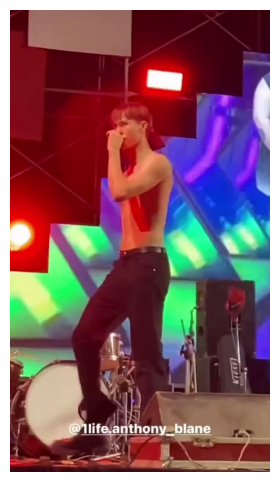

In [5]:
# Select an image path from your dataset
image_path = df["Image Path"].iloc[10]  
# Load the image
img = cv2.imread(image_path)

# Convert BGR to RGB (since OpenCV loads in BGR format)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis("off")  
plt.show()

In [6]:
# Function to load .npy files
def load_image(path):
    return np.load(path)

# Apply function to load images into X
X = np.array([load_image(path) for path in df["Processed Image Path"]])

# Check shape
print(f"Shape of X: {X.shape}")


Shape of X: (16963, 224, 224, 3)


In [7]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import numpy as np

# Convert class labels to numbers
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df["Label"])

# Save class mapping for later use
class_names = label_encoder.classes_ 
print(f"Class Mapping: {dict(zip(range(len(class_names)), class_names))}")

# One-hot encode labels using the number of unique classes
y = to_categorical(y, num_classes=len(class_names))

# Ensure the shape is correct
print(f"One-hot Encoded y shape: {y.shape}") 

Class Mapping: {0: 'Adult', 1: 'Harmful', 2: 'Safe', 3: 'Suicide'}
One-hot Encoded y shape: (16963, 4)


In [8]:
from sklearn.model_selection import train_test_split

# Split dataset (80% training, 20% validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check data shapes
print(f"Training Data: {X_train.shape}, Labels: {y_train.shape}")
print(f"Validation Data: {X_test.shape}, Labels: {y_test.shape}")

Training Data: (13570, 224, 224, 3), Labels: (13570, 4)
Validation Data: (3393, 224, 224, 3), Labels: (3393, 4)


### `Modelling & Evaluation`

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Precision, Recall

# Define CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax') 
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
               metrics=['accuracy', Precision(), Recall()])

# Model summary
model.summary()

c:\Users\rache\OneDrive\Desktop\MSBAnDS\spring_semester_25\Research & Communication II\ai_content_firewall\virtual\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train, 
    validation_data=(X_test, y_test),
    epochs=10, batch_size=32
)

##### **Observations & Problems On First Model With no Additional Web Images**
- Training Accuracy is High (93%)
    - The model is learning well on the training set.
    - The loss is decreasing, which means the model is fitting the training data correctly.
- Validation Accuracy is Low (57-59%)
    - The validation accuracy does not improve much after Epoch 1 at 59%.
    - Even though training accuracy keeps increasing, validation accuracy does not improve.
- Validation Loss is Increasing
    - The validation loss starts at 1.0087 and keeps increasing to 2.1548.
    - This suggests the model is overfitting—it's memorizing training data but failing to generalize.

#### **Model Advancement**

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get model predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert one-hot to label index
y_true = np.argmax(y_test, axis=1)  # Convert one-hot to label index

# Print classification report (Precision, Recall, F1-Score)
print(classification_report(y_true, y_pred_classes, target_names=label_mapping.keys()))

# Print confusion matrix
print(confusion_matrix(y_true, y_pred_classes))


In [11]:
# Evaluate on Evaluation Set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Model Accuracy on Eval Set: {accuracy:.2f}")

46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 125ms/step - accuracy: 0.5822 - loss: 2.2004
Model Accuracy on Eval Set: 0.60


In [11]:
y_test[:5]

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.]])

In [13]:
X_test[:5]

array([[[[0.53333333, 0.6       , 0.68235294],
         [0.53333333, 0.6       , 0.68235294],
         [0.5372549 , 0.60392157, 0.68627451],
         ...,
         [0.70196078, 0.75686275, 0.8       ],
         [0.69803922, 0.75294118, 0.8       ],
         [0.69803922, 0.75294118, 0.8       ]],

        [[0.53333333, 0.6       , 0.68235294],
         [0.53333333, 0.6       , 0.68235294],
         [0.5372549 , 0.60392157, 0.68627451],
         ...,
         [0.70196078, 0.75686275, 0.80392157],
         [0.69803922, 0.75294118, 0.8       ],
         [0.69803922, 0.75294118, 0.8       ]],

        [[0.52941176, 0.59607843, 0.67843137],
         [0.53333333, 0.59607843, 0.67843137],
         [0.5372549 , 0.6       , 0.68235294],
         ...,
         [0.70196078, 0.75686275, 0.80392157],
         [0.70196078, 0.75686275, 0.80392157],
         [0.70196078, 0.75686275, 0.8       ]],

        ...,

        [[0.50588235, 0.59607843, 0.65882353],
         [0.50588235, 0.59607843, 0.65882353]

In [12]:
# Predict on new data
predictions = model.predict(X_test)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Convert numeric labels back to text
predicted_classes = label_encoder.inverse_transform(predicted_labels)

# Show first 5 predictions
print(predicted_classes[:5])

46/46 ━━━━━━━━━━━━━━━━━━━━ 5s 95ms/step
['Harmful Content' 'Safe' 'Adult Content' 'Adult Content' 'Adult Content']
